# Objective

# Collecting the data

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [226]:
df=pd.read_csv(r"D:\Board Infinity\ML_Project\Logistic_Regression_Titanic_Project\train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyzing the data

In [227]:
print("Number of survived passenger:",len(df.Survived))

Number of survived passenger: 891


In [228]:
#finding out the correlation between the all the variables

<AxesSubplot:>

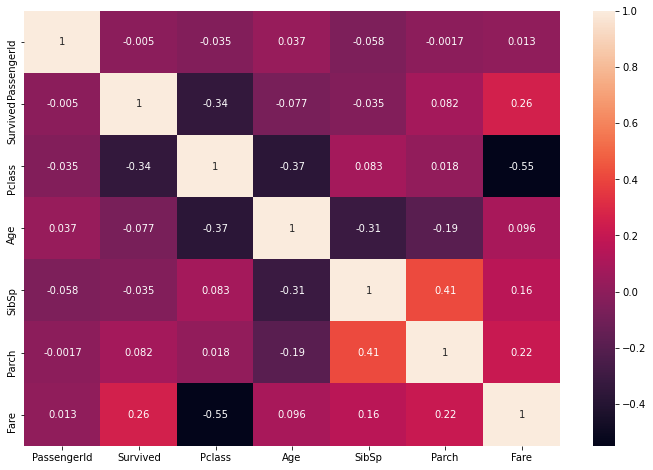

In [229]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

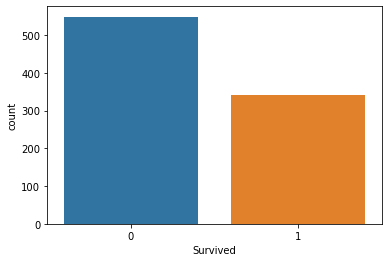

In [230]:
sns.countplot(x=df.Survived,data=df)

In [231]:
#Here we are making a count plot to find the realtion between Survived and Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

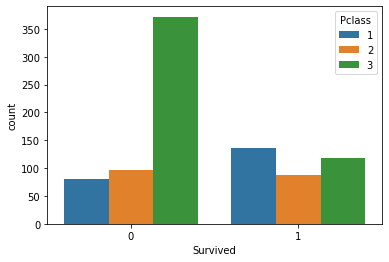

In [232]:
sns.countplot(x=df.Survived,hue=df.Pclass,data=df)

In [233]:
#Insight: So most of men who died are from the 3rd class

In [234]:
#Now making another count plot to know the relation between survival and gender of the passenger

<AxesSubplot:xlabel='Survived', ylabel='count'>

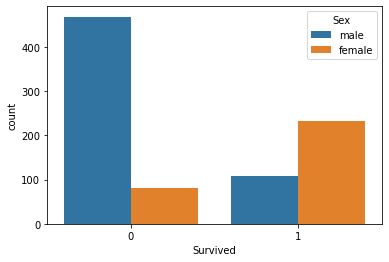

In [235]:
sns.countplot(x=df.Survived,hue=df.Sex,data=df)

In [236]:
#insight: so here you can see that there are lot of men died then survived.

In [237]:
x = df.loc[df.Survived.eq(0) & df.Sex.eq("male") & df.Pclass.eq(3)]
print(len(x))

300


In [238]:
#with the above given code, you can see the passengers from the 3rd class who were men had the most number of death

In [239]:
#below given count plot is for showing the relation from Pclass and Sex

<AxesSubplot:xlabel='Pclass', ylabel='count'>

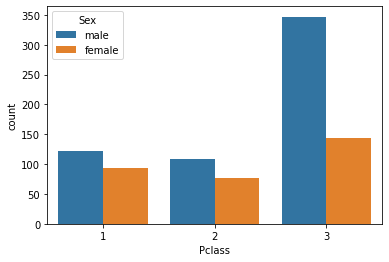

In [240]:
sns.countplot(x="Pclass",hue="Sex",data=df)

In [241]:
#finding out the age distribution in the titanic dataset

<AxesSubplot:ylabel='Frequency'>

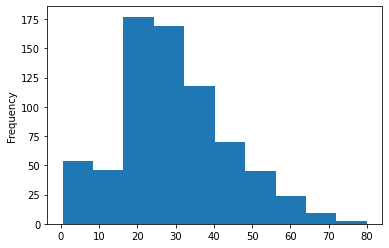

In [242]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

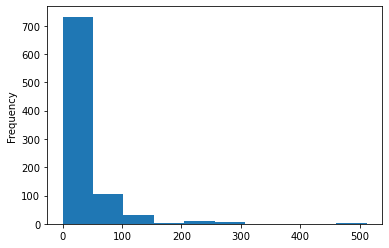

In [243]:
df['Fare'].plot.hist()

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Wrangling

In [245]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

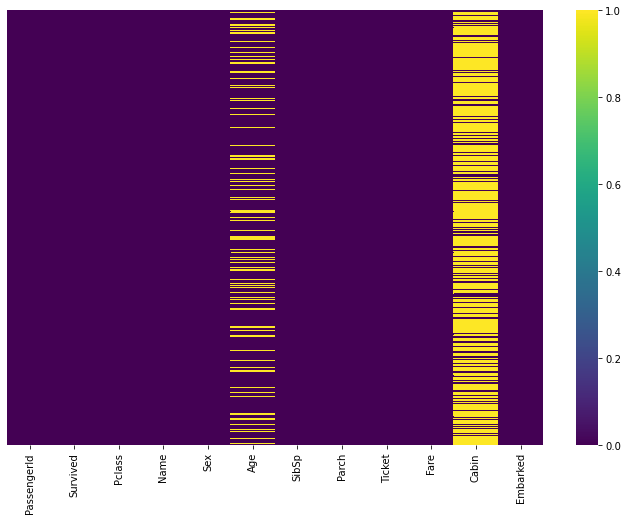

In [246]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [247]:
#here we have some null values in Age, Cabin and embarked columns

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

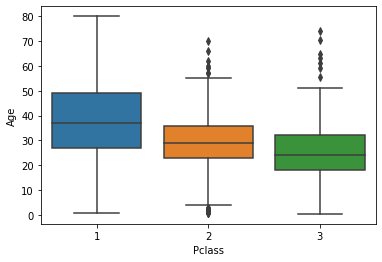

In [248]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [249]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
#So for cleaning,we will going to drop the Cabin because there are lot of null values
df.drop('Cabin',axis=1,inplace=True)

In [251]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [252]:
#there are also lot of null values in age column as well so filling those values with a mean values
mean_value=df['Age'].mean()
print(mean_value)
df['Age'].fillna(value=mean_value,inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.head()

29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [253]:
#Now we are converting age column from float to int values as float type value is not crucial here
df.Age=df.Age.astype('int64')

In [254]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [255]:
#deleting other null values from out dataset
df.dropna(inplace=True)

In [256]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

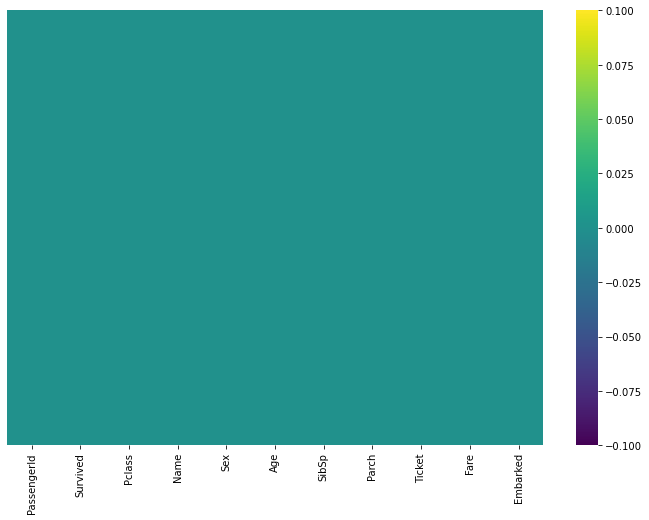

In [257]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [258]:
#so as we can see there as no null values left

In [259]:
#making some dummy variables
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [260]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [261]:
#same process can be applied for the Pclass
pcl=pd.get_dummies(df['Pclass'],drop_first=True)
pcl.head()


,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [262]:
#now concatinating all the above values with main dataset
df=pd.concat([df,sex,embark,pcl],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,0,1,0,1


In [263]:
#now we don't need Pclass, Sex, Embarked column so dropping those columns
df.drop(['Pclass','Sex','Embarked','PassengerId','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,"Braund, Mr. Owen Harris",22,1,0,7.2500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26,0,0,7.9250,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,53.1000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35,0,0,8.0500,1,0,1,0,1


In [264]:
#we can drop the name as well because it is not crucial
df.drop(['Name'],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22,1,0,7.2500,1,0,1,0,1
1,1,38,1,0,71.2833,0,0,0,0,0
2,1,26,0,0,7.9250,0,0,1,0,1
3,1,35,1,0,53.1000,0,0,1,0,0
4,0,35,0,0,8.0500,1,0,1,0,1


# Train & Test

In [265]:
X=df.drop("Survived",axis=1)
y=df['Survived']

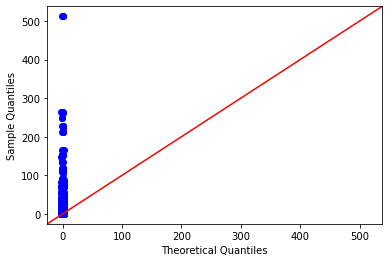

In [266]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
sm.qqplot(df, line='45')
pylab.show()

In [267]:
#So we know that this data does not follow normal distriution

In [268]:
from sklearn.model_selection import train_test_split

In [269]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [270]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [271]:
lr=LogisticRegression()

In [272]:
lr.fit(X_train,y_train)

LogisticRegression()

In [273]:
pred=lr.predict(X_test)

In [274]:
from sklearn.metrics import classification_report

In [275]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.84      0.84       167\n           1       0.73      0.72      0.72       100\n\n    accuracy                           0.79       267\n   macro avg       0.78      0.78      0.78       267\nweighted avg       0.79      0.79      0.79       267\n'

In [276]:
from sklearn.metrics import confusion_matrix

In [277]:
confusion_matrix(y_test,pred)

array([[140,  27],
       [ 28,  72]], dtype=int64)

In [278]:
from sklearn.metrics import accuracy_score

In [279]:
accuracy_score(y_test,pred)

0.7940074906367042

In [280]:
#So at the end we got a good accuracy score and let's try given test data

In [281]:
#Now we should be using the given test data for real world use

In [282]:
test_data=pd.read_csv(r"D:\Board Infinity\ML_Project\Logistic_Regression_Titanic_Project\test.csv")

In [283]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [284]:
test_data_1=test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [285]:
test_data_1.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [286]:
test_data_1['Age'].fillna(test_data_1['Age'].mean(),inplace=True)
test_data_1['Fare'].fillna(test_data_1['Fare'].mean(),inplace=True)

In [287]:
test_data_1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [288]:
sex_sub=pd.get_dummies(test_data_1['Sex'],drop_first=True)
embark_sub=pd.get_dummies(test_data_1['Embarked'],drop_first=True)
pcl_sub=pd.get_dummies(test_data_1['Pclass'],drop_first=True)

test_data_1=pd.concat([test_data_1,sex_sub,embark_sub,pcl_sub],axis=1)
test_data_1.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)
test_data_1.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [289]:
test_data_1.Age=test_data_1.Age.astype('int64')


In [290]:
test_pred=lr.predict(test_data_1)

In [291]:
submission=pd.DataFrame({"PassengerID":test_data["PassengerId"],"Survived":test_pred})

In [293]:
submission.to_csv("Titanic_Submission",index=False)